# Time Series Prediction

### Note:
- Be sure to select the "timeseries" kernel as defined in the article text
- Alternatively you can create your own kernel and install the following by creating a new cell and running these commands:
```
!pip install -U pip
!pip install -U setuptools wheel
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu
!pip install autogluon
```

This data used in this exercise was synthesized after reconstructing and digitizing an electrcial grid plot from [Toronto-Hydro-Transformer-Monitors](https://www.scribd.com/document/452407468/Toronto-Hydro-Transformer-Monitors)  then finding the mean and standard deviation for every time slice in the contructed graph for several days worth of data. This proviided  a gaussian distribution that could be sampled from to generate an infinite number of datas worth of data. Several such days of synthetic data have been saved in anomaly.csv.

We use this data as a starting point to generate new data in the desired Chronos format: anomalySeries.csv

You can follow the tutorial from Article: **Forecasting with Chronos** which was of great help getting started
- https://auto.gluon.ai/stable/tutorials/timeseries/forecasting-chronos.html



In [1]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from tqdm.auto import tqdm

# Anomaly

Explore the data

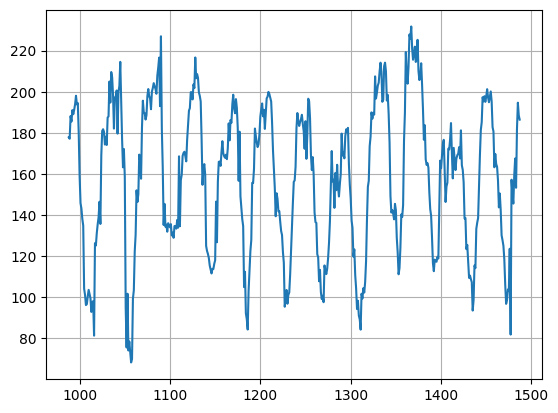

In [2]:
import pandas as pd
df = pd.read_csv("anomalySeries.csv")
plt.plot( df.target[-500:])
plt.grid()
plt.show()

In [3]:
# Put into TimeSeries format
data = TimeSeriesDataFrame(
    "anomalySeries.csv"
)

In [4]:
# Split test and train data, and run zero-shot forecasting
prediction_length = 24
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
   train_data, presets="bolt_small",
)

Beginning AutoGluon training...
AutoGluon will save models to '/home/u5986435197fcdb2201783d8af898415/Unsupervised/ChronosTimeSeriesPredictor/AutogluonModels/ag-20250210_211723'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #138-Ubuntu SMP Sat Nov 30 22:28:23 UTC 2024
CPU Count:          192
GPU Count:          0
Memory Avail:       980.04 GB / 1007.54 GB (97.3%)
Disk Space Avail:   252339.64 GB / 372529.03 GB (67.7%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosit

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


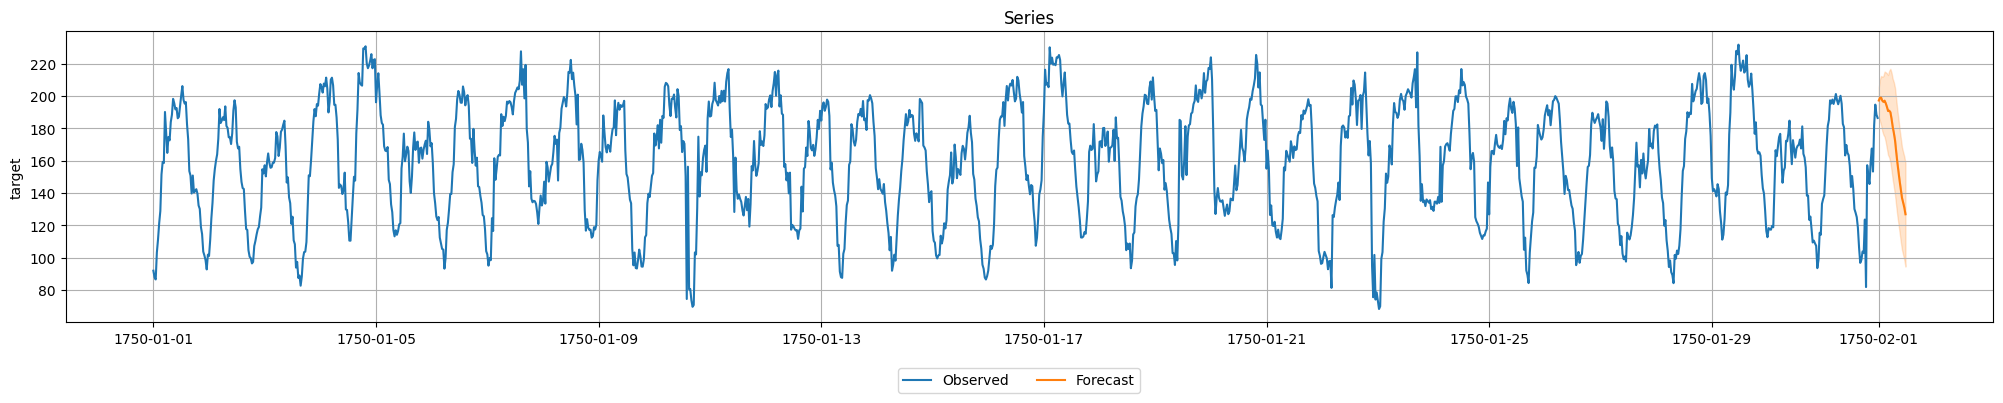

In [5]:
predictions = predictor.predict(test_data)

# Turn off matplotlib interactive mode to prevent generating plots twice when called from TimeSeriesPredictor.plot
plt.ioff()

Len = data.shape[0]
predictor.plot(
    data=data, 
    predictions=predictions, 
    item_ids=["Series"],
    max_history_length=Len,
)